<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_CNN_A_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     191  128.548599  129.177902  ...    1.000000    0.461884    0.078287
1     164   74.713860   87.283760  ...  125.985733  120.003578  106.640694
2     123  102.769325   93.195786  ...  178.165466  174.524490  109.244957
3     115    0.479168    3.363402  ...  158.468124  166.030548  166.098892
4     109  147.899414  149.716766  ...  110.039215  106.948311  113.472183
5     200   72.569206   97.820000  ...    1.499600    0.216400    1.282400
6     101  168.973343  160.603195  ...   93.655037   96.467606  101.931580
7     128  178.843750  180.738281  ...    0.183594    0.558594    1.464844
8     147  176.287979  180.315216  ...  132.292526  134.852615  134.653061
9     195  215.762329  205.546799  ...  129.759674  142.191956  154.994431
10    186  116.805191  119.399010  ...  115.107880  129.352325  132.515213
11    192  237.805099  241.253006  ...  126.153641  129.982193  132.050339
12    137  248.554367  25

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

'''
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', 
                      solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)
  
prediction = model.predict(X_test)
  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
'''

"\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', \n                      solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)\n  \nprediction = model.predict(X_test)\n  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionario\n\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\n\n\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\n\ny_true = df['y_true']\ny_pred = df['y_predict']\n\n  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\n"

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=20))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=15, batch_size=32)


Epoch 1/15
11/11 [==============================] - 15s 30ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 2/15
11/11 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5148
Epoch 3/15
11/11 [==============================] - 0s 30ms/step - loss: 0.6936 - accuracy: 0.4783
Epoch 4/15
11/11 [==============================] - 0s 30ms/step - loss: 0.6937 - accuracy: 0.4404
Epoch 5/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6933 - accuracy: 0.4802
Epoch 6/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6933 - accuracy: 0.4765
Epoch 7/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6926 - accuracy: 0.5205
Epoch 8/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6930 - accuracy: 0.5380
Epoch 9/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6928 - accuracy: 0.5183
Epoch 10/15
11/11 [==============================] - 0s 29ms/step - loss: 0.6940 - accuracy: 0.4646
Epoch 11

In [17]:
Y_test = yback(Y_test)

In [18]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   144.0   65.260803   65.020065  ...  100.412811  106.258499  110.693680
1   197.0   67.919121   63.767452  ...    0.099565    0.142132    0.142132
2   165.0   42.823174   47.074341  ...   96.804298   99.042213  101.761398
3   165.0   96.870705   74.091202  ...   39.628136   39.416862   39.030819
4   180.0   96.648911  100.000504  ...  104.133835  106.869644  109.506187
5   101.0    9.093324   10.262622  ...   88.491135   88.955200   90.050392
6   159.0  117.536644  105.274788  ...   72.369171  105.308266  237.003342
7   155.0   54.860355   56.828724  ...    0.193465    0.230760    0.230760
8   164.0   63.926826   69.195122  ...  103.287933  107.361107  109.018440
9   144.0   96.114212   94.211426  ...   66.362656   62.998459   64.635033
10  124.0   32.419353   32.938606  ...    2.060354    1.753382    1.451613
11  163.0   34.937107   30.548611  ...   53.200424   41.609959   31.659569
12  136.0   59.606407   5

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 580, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (340/340), done.
remote: Total 580 (delta 205), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (580/580), 5.02 MiB | 14.36 MiB/s, done.
Resolving deltas: 100% (342/342), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 14.27 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,144.0,65.260803,65.020065,66.556328,73.575615,81.037811,82.474548,84.463737,89.010803,90.485336,93.443672,96.580246,100.034721,101.052475,98.611122,102.033958,103.009262,97.207565,88.152000,87.017746,87.770065,88.904320,92.404320,98.035507,101.797844,103.154327,108.332565,117.173615,120.432098,68.163582,68.465279,68.887344,73.960648,80.470680,83.872681,85.349533,84.329483,85.087196,88.989204,92.189049,...,68.417442,69.786270,70.236885,66.469910,62.410496,58.708332,55.368832,50.969139,53.419758,75.950615,98.716827,108.754639,51.983799,52.302467,54.456017,57.996918,59.375004,58.717594,54.343365,41.321762,30.340281,58.716824,73.827164,77.272369,75.186737,72.716820,71.494598,71.981483,72.456024,71.236115,72.442902,69.592590,66.980705,60.001549,54.126549,57.466824,81.394302,100.412811,106.258499,110.693680
1,197.0,67.919121,63.767452,58.730457,58.434128,67.755028,82.103920,96.267593,100.796288,101.608589,103.084389,103.947441,105.596802,105.514343,104.189087,105.909103,112.869339,119.309853,120.337715,133.980194,139.558075,86.306358,31.355486,27.386097,28.457705,36.855347,103.139923,109.175354,111.259094,65.759674,62.683540,58.869499,54.473705,71.247627,97.213303,102.403442,96.901260,98.715561,100.813377,103.517548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405499,1.447371,1.919761,0.000000,0.000000,0.064933,0.142132,0.142132,0.054833,0.128424,0.073591,0.000000,0.676364,0.450591,0.010101,0.092350,0.142132,0.142132,0.142132,0.142132,0.142132,0.142132,0.142132,0.142132,0.103893,0.099565,0.142132,0.142132
2,165.0,42.823174,47.074341,51.331787,51.747440,49.877609,42.974770,31.068134,20.241985,17.039890,17.321102,16.688450,16.355080,16.828796,18.616714,20.581745,23.127642,44.840221,80.432213,107.132515,115.239479,118.220718,120.797607,120.860870,120.514282,120.656158,114.659615,107.534218,106.592361,22.069237,25.174988,34.517685,38.620094,33.256710,27.578182,23.344574,19.361250,18.918386,17.978512,17.453701,...,103.420837,108.763718,106.519012,100.728157,100.821671,101.399010,99.933235,98.943626,95.956985,96.819130,99.445152,99.775513,122.877365,114.342560,111.492821,118.588203,120.651611,124.590569,127.835373,125.559456,123.141640,126.524109,152.611832,181.086548,195.870804,231.351028,218.717850,61.089184,105.432510,108.258286,103.880409,101.169380,100.466492,102.350121,102.841370,101.764648,96.231003,96.804298,99.042213,101.761398
3,165.0,96.870705,74.091202,52.187107,32.733150,9.930175,1.862443,0.798421,0.242461,0.103765,0.024793,0.000000,0.194233,1.650174,6.980349,12.926171,15.237282,14.175537,14.081800,14.729513,15.668504,16.269789,16.989422,16.294106,17.001102,19.110304,19.841248,17.976198,15.677282,114.865791,105.828804,96.664474,82.374435,65.678276,16.120148,1.830634,0.756327,0.782626,0.367493,0.589899,...,50.766907,39.255207,41.716328,40.441101,39.723450,34.992146,34.457481,36.956882,36.544132,38.657997,39.304756,39.148506,68.921799,58.589828,29.965363,31.886171,82.989609,94.902184,101.723465,103.993645,108.865562,129.913788,140.649292,143.006012,145.412094,139.757584,102.777969,86.477356,46.871449,43.214581,44.478130,44.634239,44.402832,40.646358,37.371132,38.938583,39.084007,39.628136,39.416862,39.030819
4,180.0,96.648911,100.000504,100.693832,101.726929,100.216309,94.821243,65.648399,47.664204,47.722473,46.744694,44.823708,45.240993,50.071117,52.505688,51.207413,60.171860,80.333344,92.051857,93.564445,97.345688,100.217300,103.591118,104.178276,101.885941,93.780251,74.363960,56.343212,54.939270,97.437042,102.238533,100.512108,100.882980,95.489883,70.792099,47.040005,47.691360,48.146675,47.795067,46.325436,...,92.909637,101.554588,101.116554,98.422729,96.223213,99.118530,102.920509,

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

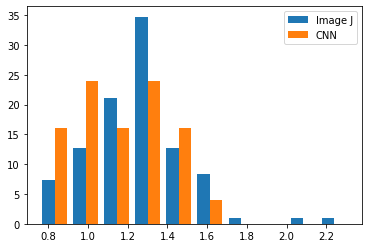

In [27]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [16.         24.         16.         24.         16.          4.
   0.          0.          0.          0.        ]]


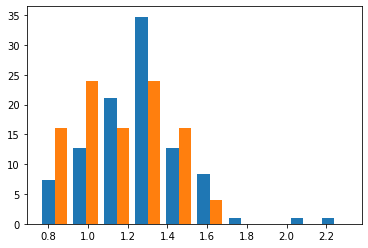

In [28]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [29]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


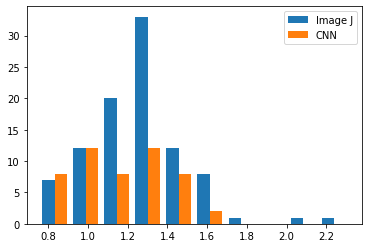

In [30]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [31]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1